<h1 align="center"> 
Capstone Project - Default of Credit Card Clients Dataset
</h1> 

<h2 align="center"> 
By: Deen Huang
</h2>
<h3 align="center"> 
December 2, 2018
</h3>

## Import Libraries

In [652]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import warnings
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

## Loading Data

In [653]:
#loading data
data = pd.read_csv('UCI_Credit_Card.csv', header=0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Exploratory Data Analysis

In [654]:
data.rename(columns={'default.payment.next.month':'default'}, inplace=True)
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
data = data.drop('ID', axis=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [655]:
data.shape

(30000, 24)

In [656]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [657]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

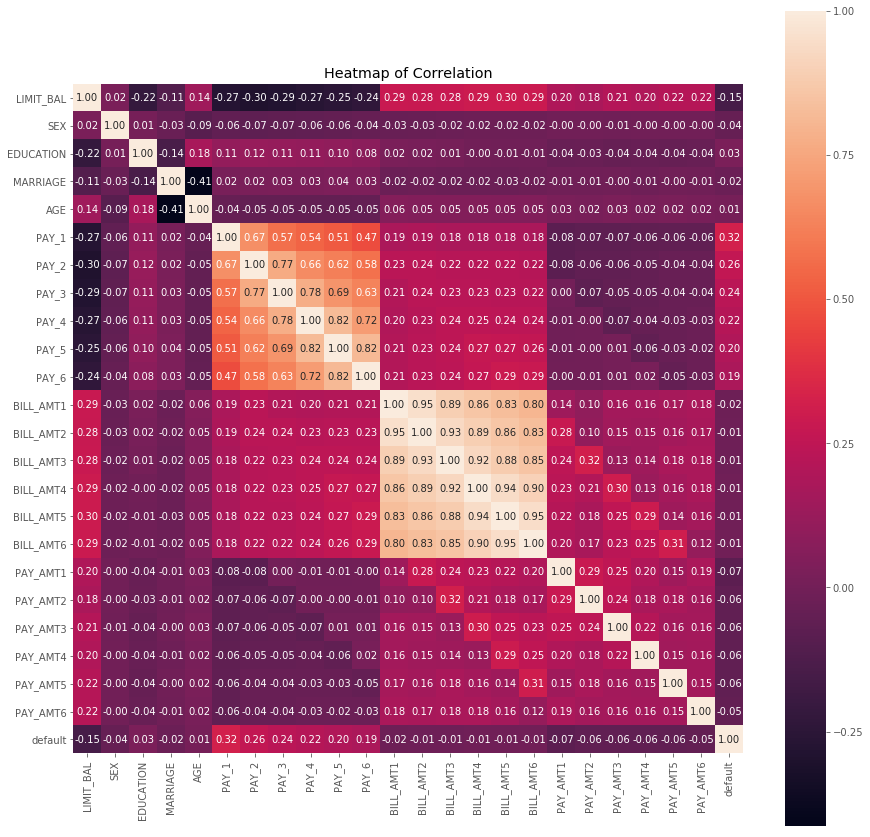

In [658]:
corr=data.corr()
corr = (corr)
#sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
hm = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=corr.columns.values,
                 xticklabels=corr.columns.values)

plt.title('Heatmap of Correlation')
plt.show()

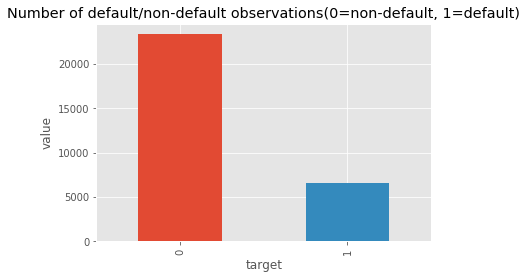

In [659]:
#check balance
plt.figure()
pd.Series(data['default']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("value")
plt.xlabel("target")
plt.title('Number of default/non-default observations(0=non-default, 1=default)');

In [660]:
# find the ratio for default and non-default target
default, non_default = data.default.value_counts()
print(data.default.value_counts())
print()

default = len(data[data['default']==1])
non_default = len(data[data['default']==0])

ratio = float(default/(default+non_default))
print('default Ratio :',ratio)

0    23364
1     6636
Name: default, dtype: int64

default Ratio : 0.2212


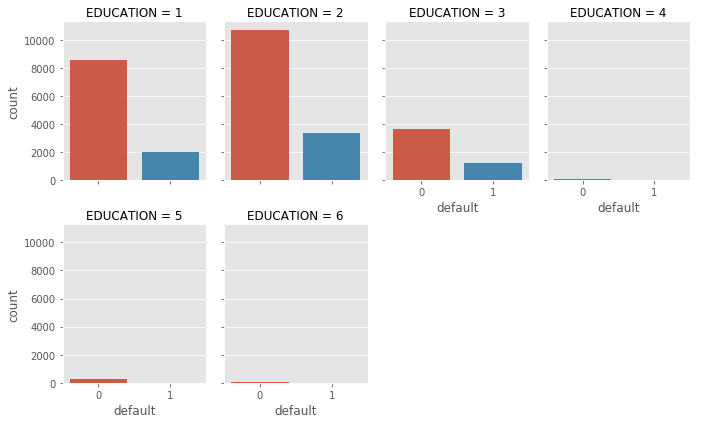

In [661]:
#compare education to defaultable observations
new_var=data[['default', 'EDUCATION']]
new_var=new_var[new_var['EDUCATION']>=1]
sns.factorplot('default', col='EDUCATION', data=new_var, kind='count', size=3, aspect=.8, col_wrap=4);

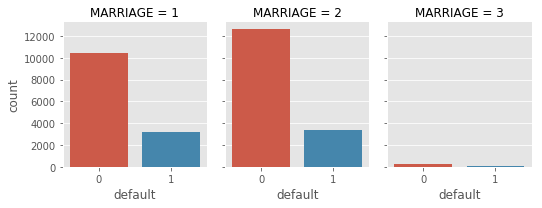

In [662]:
#compare marriage to defaultable observations
new_var=data[['default', 'MARRIAGE']]
new_var=new_var[new_var['MARRIAGE']>=1]
sns.factorplot('default', col='MARRIAGE', data=new_var, kind='count', size=3, aspect=.8, col_wrap=4);

## Modeling

### Classical Machine Learning - Gaussian Naive Bayes

In [663]:
# set the dataframe for features and target
X = data.drop(['default'], axis=1)
y = data['default']

In [664]:
# split dataset into 20% of test data and 80% training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [665]:
# Normalize the data 

# rescaling the features to a standard normal distribution with a mean of 0 and standard deviation of 1
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [666]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [667]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB.fit(X_train_scaled, y_train)

GaussianNB(priors=None)

In [668]:
y_pred = clf_GNB.predict(X_test_scaled)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['GNB', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,GNB,0.554,0.295825,0.770239,0.427471,0.632302


In [669]:
cfm=confusion_matrix(y_test, y_pred)

Text(0.5,15,'Predicted label')

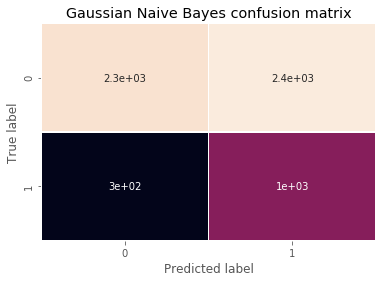

In [670]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [671]:
print("Test data- Gaussian Naive Bayes report \n", classification_report(y_test, y_pred))

Test data- Gaussian Naive Bayes report 
              precision    recall  f1-score   support

          0       0.89      0.49      0.63      4703
          1       0.30      0.77      0.43      1297

avg / total       0.76      0.55      0.59      6000



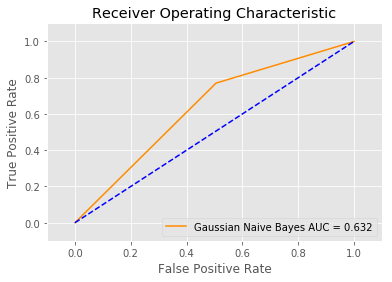

In [672]:
# graph the ROC
def roc_curve_acc(Y_test, Y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(Y_test, y_pred_GNB, "Gaussian Naive Bayes")

### Deep Learning - Neural Network

In [673]:
#Process the imbalanced data set for neural network

#Create a new Class for Non Default observations.
data.loc[data.default == 0, 'non_default'] = 1
data.loc[data.default == 1, 'non_default'] = 0

#Create dataframes of only default and nonDefault
default = data[data.default == 1]
non_default = data[data.non_default == 1]

# Set X_train equal to 80% of default observations
X_train = default.sample(frac=0.8)

# Add 80% of the non-default observations to X_train.
X_train = pd.concat([X_train, non_default.sample(frac = 0.8)], axis = 0)

# X_test contains all the observations which are not in X_train.
X_test = data.loc[~data.index.isin(X_train.index)]

#Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

#Add target to y_train and y_test.
y_train = X_train.default
y_train = pd.concat([y_train, X_train.non_default], axis=1)

y_test = X_test.default
y_test = pd.concat([y_test, X_test.non_default], axis=1)

#Drop target from X_train and X_test.
X_train = X_train.drop(['default','non_default'], axis = 1)
X_test = X_test.drop(['default','non_default'], axis = 1)

#Names the features in X_train.
features = X_train.columns.values

# rescaling the features to a standard normal distribution with a mean of 0 and standard deviation of 1
for feature in features:
    mean, std = data[feature].mean(), data[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std
    
# Split the data set
split = int(len(y_test)/2)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
X_valid = X_test.as_matrix()[:split]
y_valid = y_test.as_matrix()[:split]
X_test = X_test.as_matrix()[split:]
y_test = y_test.as_matrix()[split:]

In [682]:
# build 5-hidden-layer NN and save the entire model

#set layer neurons and learning rate
H1_N = 23
H2_N = 23*2
H3_N = 23*3
H4_N = 23*4
H5_N = 23*5

learning_rate = 0.02

# declare the basic structure of the data
x = tf.placeholder("float", shape=[None, 23])
y_ = tf.placeholder("float", shape=[None, 2])

def weight_variable(shape, index):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, index)

def bias_variable(shape, index):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, index)

# layer 1
W_N1 = weight_variable(shape = [23,H1_N], index = 'W_N1')
b_N1 = bias_variable(shape = [H1_N], index = 'b_N1')
h_fc1 = tf.nn.sigmoid(tf.matmul(x, W_N1) + b_N1)

# layer 2
W_N2 = weight_variable(shape = [H1_N,H2_N], index = 'W_N2')
b_N2 = bias_variable(shape = [H2_N], index = 'b_N2')
h_fc2 = tf.nn.sigmoid(tf.matmul(h_fc1, W_N2) + b_N2)

# layer 3
W_N3 = weight_variable(shape = [H2_N,H3_N], index = 'W_N3')
b_N3 = bias_variable(shape = [H3_N], index = 'b_N3')
h_fc3 = tf.nn.sigmoid(tf.matmul(h_fc2, W_N3) + b_N3)

# layer 4
W_N4 = weight_variable(shape = [H3_N,H4_N], index = 'W_N4')
b_N4 = bias_variable(shape = [H4_N], index = 'b_N4')
h_fc4 = tf.nn.sigmoid(tf.matmul(h_fc3, W_N4) + b_N4)

# layer 5
W_N5 = weight_variable(shape = [H4_N,H5_N], index = 'W_N5')
b_N5 = bias_variable(shape = [H5_N], index = 'b_N5')
h_fc5 = tf.nn.sigmoid(tf.matmul(h_fc4, W_N5) + b_N5)

#output layer
W_N6 = weight_variable(shape = [H5_N,2], index = 'W_N6')
b_N6 = bias_variable(shape = [2], index = 'b_N6')
y = tf.nn.softmax(tf.matmul(h_fc5, W_N6) + b_N6)

# Parameters
training_epochs = 110
training_dropout = 0.8
n_samples = y_train.shape[0]
batch_size = 500
pkeep = tf.placeholder(tf.float32) 

# Cost function: Cross_entropy
# Loss
y_clipped = tf.clip_by_value(y, 1e-10, 0.9999999)
cost = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y_clipped)
                         + (1 - y_) * tf.log(1 - y_clipped), axis=1))

correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

###### Save the model
accuracyNew = []
costNew = []
validAccuracyNew = [] 
validCostNew = []
testAccuracyNew = []
testCostNew = []
    
# training cycles
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for epoch in range(training_epochs): 
    for batch in range(int(n_samples/batch_size)):
        batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
        batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

        sess.run([optimizer], feed_dict={x: batch_x, 
                                         y_: batch_y,
                                         pkeep: training_dropout})

    # Display every 10 epochs
    if (epoch) % 10 == 0:
        train_accuracy, train_cost = sess.run([accuracy, cost], feed_dict={x: X_train, 
                                                                           y_: y_train,
                                                                           pkeep: training_dropout})

        valid_accuracy, valid_cost = sess.run([accuracy, cost], feed_dict={x: X_valid, 
                                                                           y_: y_valid,
                                                                           pkeep: training_dropout})
        
        test_accuracy, test_cost = sess.run([accuracy, cost], feed_dict={x: X_test, 
                                                                         y_: y_test,
                                                                         pkeep: training_dropout})

        print ("Epoch:", epoch,
               "Acc =", "{:.3f}".format(train_accuracy), 
               "Cost =", "{:.3f}".format(train_cost),
               "Valid_Acc =", "{:.3f}".format(valid_accuracy), 
               "Valid_Cost = ", "{:.3f}".format(valid_cost),
               "test_Acc =", "{:.3f}".format(test_accuracy), 
               "test_Cost = ", "{:.3f}".format(test_cost))
            
        # Store the results of the model
        accuracyNew.append(train_accuracy)
        costNew.append(train_cost)
        validAccuracyNew.append(valid_accuracy)
        validCostNew.append(valid_cost)
        testAccuracyNew.append(test_accuracy)
        testCostNew.append(test_cost)
            
print()
print("Optimization Finished!")
print()
    
#saver = tf.train.Saver()
#saver.save(sess, save_path='./DNN_well_trained.ckpt')

Epoch: 0 Acc = 0.779 Cost = 1.060 Valid_Acc = 0.789 Valid_Cost =  1.029 test_Acc = 0.768 test_Cost =  1.091
Epoch: 10 Acc = 0.821 Cost = 0.869 Valid_Acc = 0.830 Valid_Cost =  0.844 test_Acc = 0.810 test_Cost =  0.901
Epoch: 20 Acc = 0.821 Cost = 0.856 Valid_Acc = 0.828 Valid_Cost =  0.835 test_Acc = 0.811 test_Cost =  0.894
Epoch: 30 Acc = 0.819 Cost = 0.856 Valid_Acc = 0.826 Valid_Cost =  0.841 test_Acc = 0.807 test_Cost =  0.897
Epoch: 40 Acc = 0.823 Cost = 0.844 Valid_Acc = 0.829 Valid_Cost =  0.829 test_Acc = 0.813 test_Cost =  0.892
Epoch: 50 Acc = 0.826 Cost = 0.838 Valid_Acc = 0.831 Valid_Cost =  0.825 test_Acc = 0.815 test_Cost =  0.886
Epoch: 60 Acc = 0.826 Cost = 0.833 Valid_Acc = 0.827 Valid_Cost =  0.824 test_Acc = 0.814 test_Cost =  0.886
Epoch: 70 Acc = 0.826 Cost = 0.826 Valid_Acc = 0.829 Valid_Cost =  0.817 test_Acc = 0.817 test_Cost =  0.875
Epoch: 80 Acc = 0.825 Cost = 0.827 Valid_Acc = 0.831 Valid_Cost =  0.814 test_Acc = 0.813 test_Cost =  0.883
Epoch: 90 Acc = 0.82

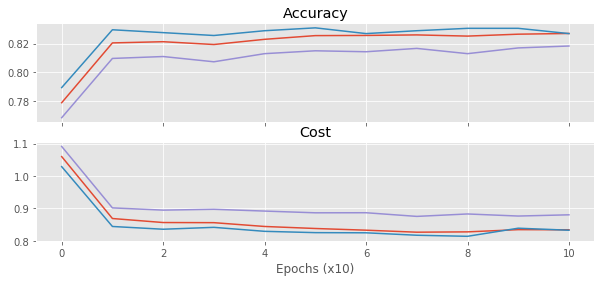

In [688]:
# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracyNew, label='train') # blue
ax1.plot(validAccuracyNew, label='validation') # red
ax1.plot(testAccuracyNew, label='test') # purple
ax1.set_title('Accuracy')

ax2.plot(costNew)
ax2.plot(validCostNew)
ax2.plot(testCostNew)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()